In [1]:
# pip install pandas
# pip install matplotlib
# pip install seaborn
# pip install numpy

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# replace blank with 0 as tenure is 0 and no total charges are recorded. 

In [6]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.isnull().sum().sum()

np.int64(0)

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
# check 

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df["customerID"].duplicated().sum()

np.int64(0)

In [14]:
# converted 0 and 1 values of senior citizen to yes/no

In [15]:
def conv(value):
    if value==1:
        return "yes"
    else:
        return "no"

df["SeniorCitizen"]=df["SeniorCitizen"].apply(conv)

In [16]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


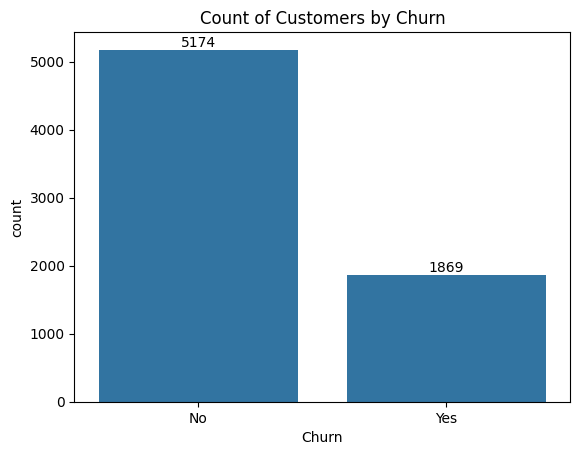

In [17]:
# sns.countplot(x='Churn', data=df)
# plt.show()

ax=sns.countplot(x='Churn', data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

In [18]:
gb=df.groupby("Churn").agg({'Churn':"count"})
gb
# plt.pie(df['Churn'])

,Churn
Churn,
No,5174
Yes,1869


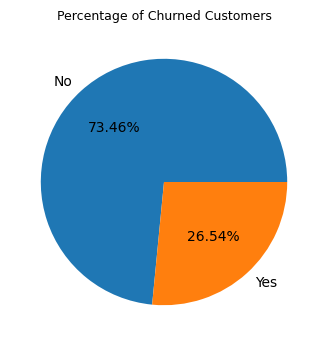

In [19]:
plt.figure(figsize=(4,4))
gb=df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels= gb.index, autopct="%1.2f%%")
plt.title("Percentage of Churned Customers", fontsize=9)
plt.show()

In [20]:
# given pie chart reflects that 26.54% of our customers have churned out
# let's explore the reason behind it

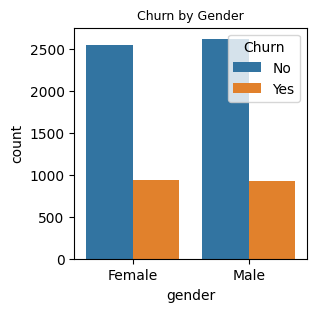

In [21]:
plt.figure(figsize=(3,3))
sns.countplot(x="gender", data=df, hue="Churn")
plt.title("Churn by Gender", fontsize=9)
plt.show()

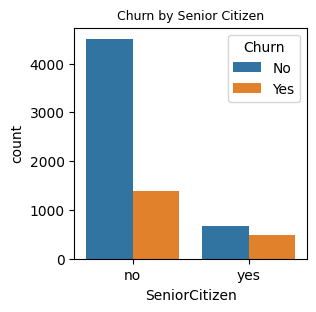

In [22]:
plt.figure(figsize=(3,3))
sns.countplot(x="SeniorCitizen", data=df, hue="Churn")
plt.title("Churn by Senior Citizen", fontsize=9)
plt.show()

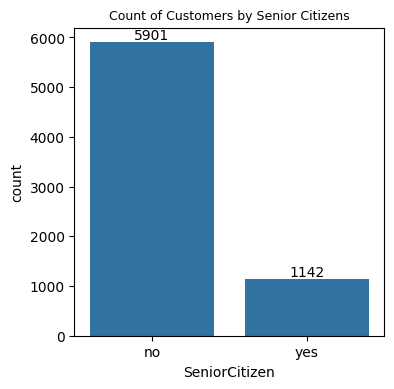

In [23]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x="SeniorCitizen", data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Senior Citizens", fontsize=9)
plt.show()

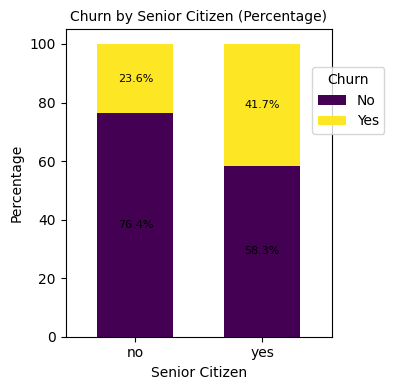

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the percentage distribution
stacked_data = (
    df.groupby("SeniorCitizen")["Churn"]
    .value_counts(normalize=True)
    .mul(100)
    .rename("Percentage")
    .reset_index()
)

# Pivot the data for stacked bar chart
pivot_data = stacked_data.pivot(index="SeniorCitizen", columns="Churn", values="Percentage")

# Plot the stacked bar chart
pivot_data.plot(
    kind="bar",
    stacked=True,
    figsize=(4, 4),
    colormap="viridis",
    width=0.6
)

# Add percentage labels
for i, bars in enumerate(pivot_data.values):
    bottom = 0
    for j, val in enumerate(bars):
        plt.text(i, bottom + val / 2, f"{val:.1f}%", ha="center", va="center", fontsize=8)
        bottom += val

# Customize the chart
plt.title("Churn by Senior Citizen (Percentage)", fontsize=10)
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage")
plt.legend(title="Churn", bbox_to_anchor=(0.9,0.9))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [25]:
# comparatively a greater percentage of senior citizens have churned out

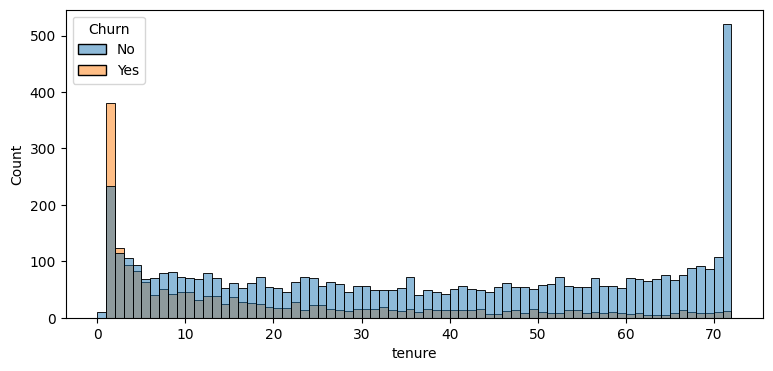

In [26]:
plt.figure(figsize=(9,4))
sns.histplot(x='tenure', data=df, bins=72, hue="Churn")
plt.show()

- people who used services for long, have stayed long. 
- people who used services for 1-2 months, have churned. 

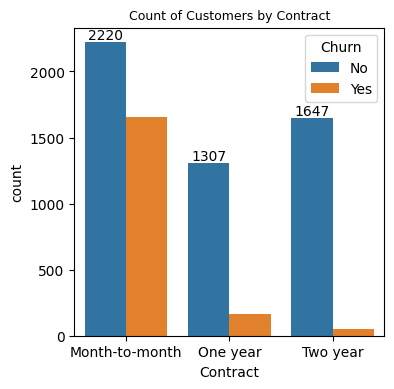

In [27]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x="Contract", data=df, hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract", fontsize=9)
plt.show()

- people who have month to month contract are likely to churn more than the group which have 1-2 years contract

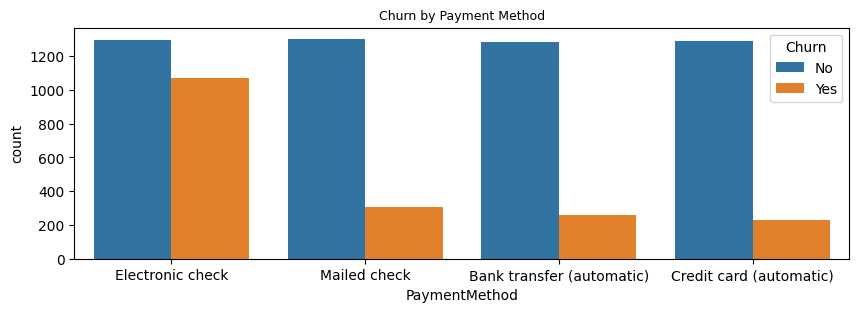

In [28]:
plt.figure(figsize=(10,3))
sns.countplot(x="PaymentMethod", data=df, hue="Churn")
plt.title("Churn by Payment Method", fontsize=9)
plt.show()

In [29]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

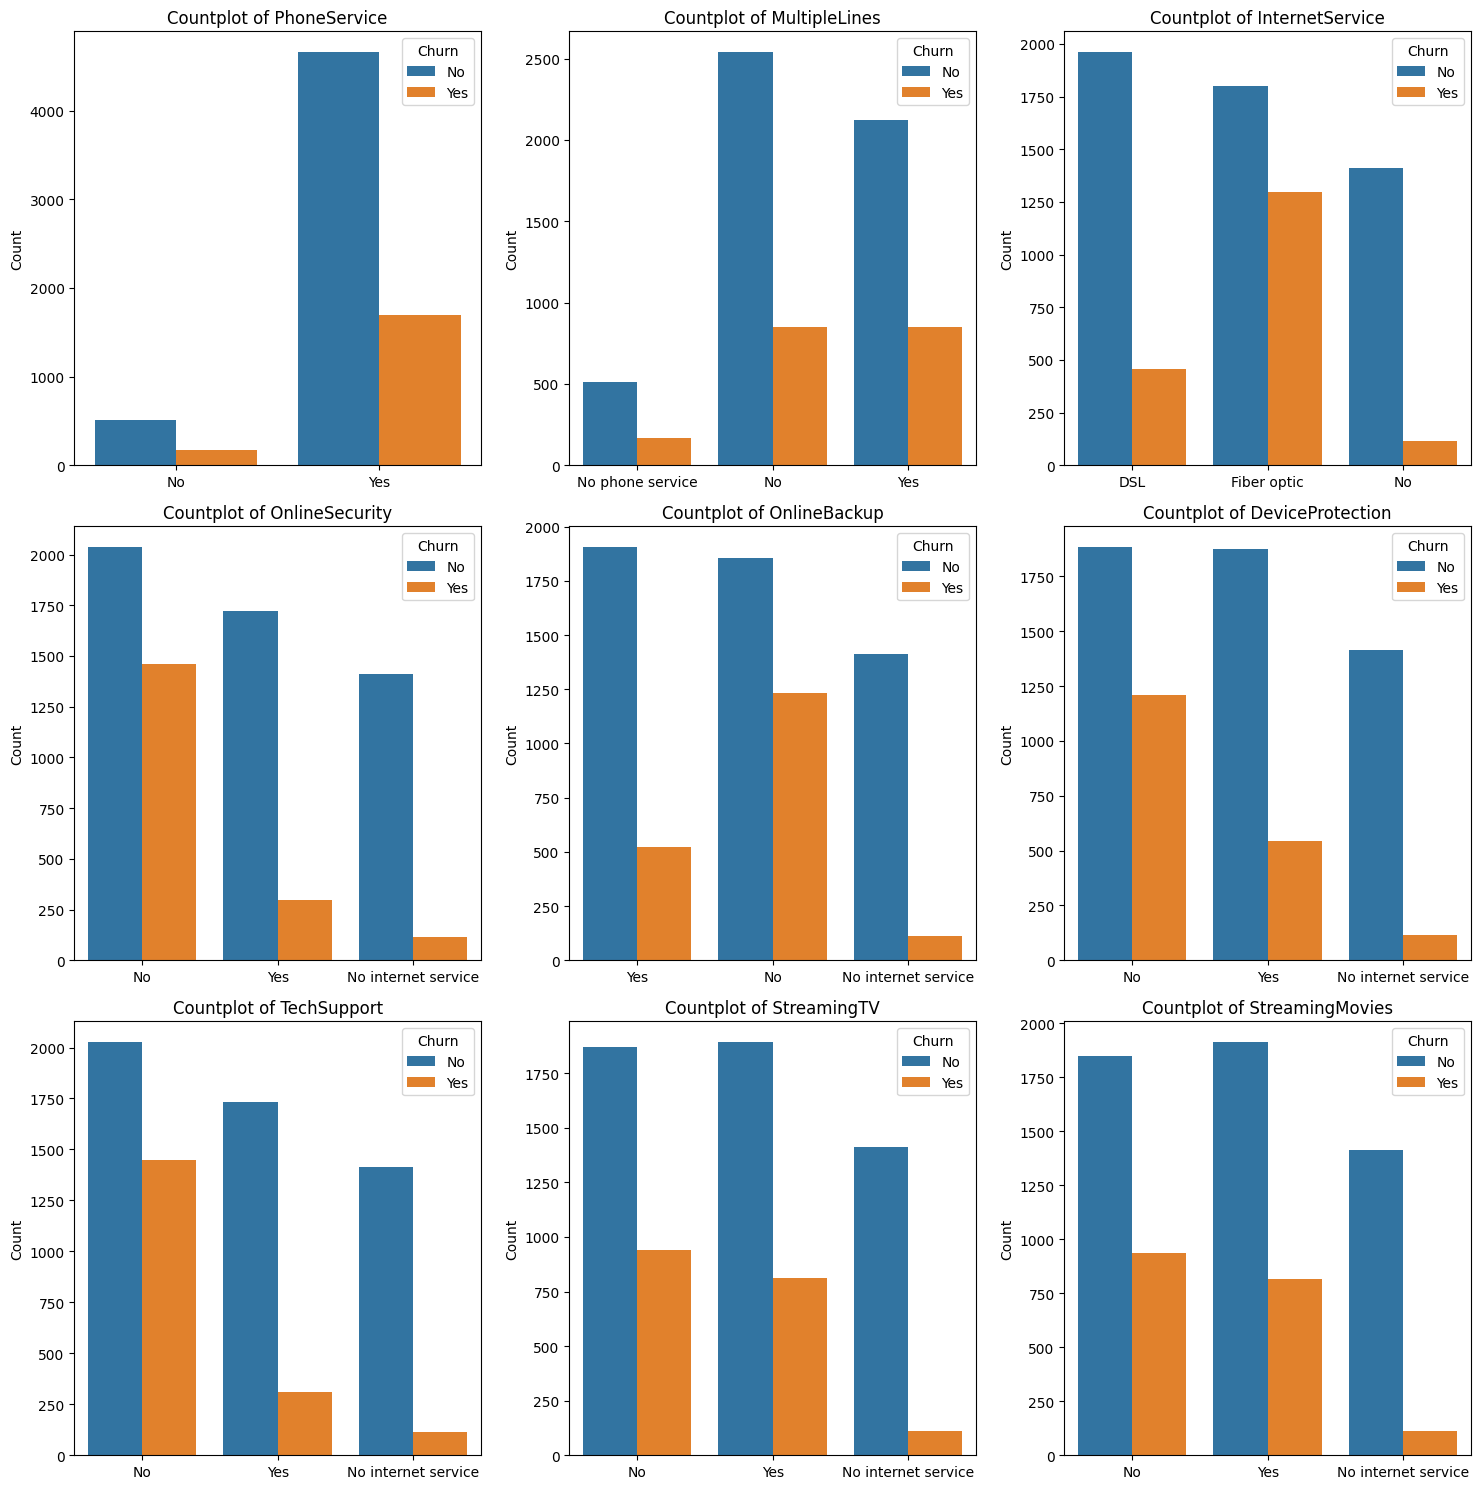

In [30]:
# Define the columns to plot
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # 3x3 grid
axes = axes.flatten()  # Flatten the axes array for easy iteration

for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, ax=axes[i], hue=df["Churn"])
    axes[i].set_title(f'Countplot of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Remove any empty subplots (if any)
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


- Most features show a near-equal split between "Yes" and "No" responses, except for InternetService,
which has distinct proportions for DSL, Fiber optic, and "No" options. 

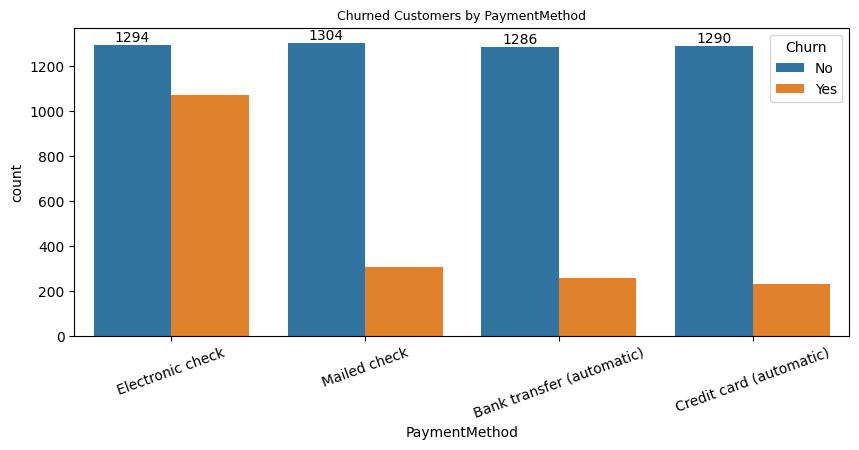

In [31]:
plt.figure(figsize=(10,4))
ax=sns.countplot(x="PaymentMethod", data=df, hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Churned Customers by PaymentMethod", fontsize=9)
plt.xticks(rotation=20)
plt.show()

- customer is likely to churn when using electronic check as a payment method. 

### Dependentwise Churn

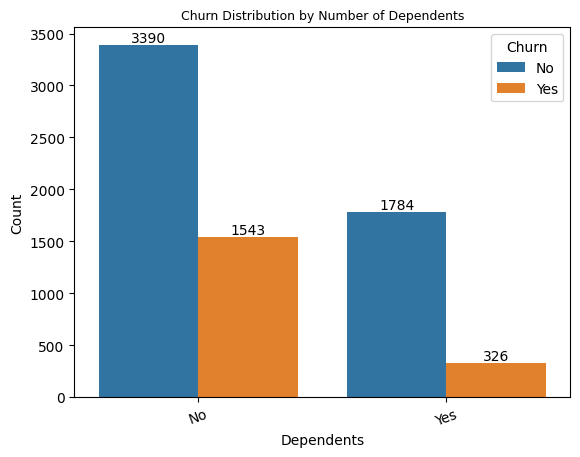

In [41]:
ax = sns.countplot(x='Dependents', data=df, hue='Churn')
ax.bar_label(ax.containers[0], label_type='edge')
ax.bar_label(ax.containers[1], label_type='edge')
plt.title("Churn Distribution by Number of Dependents", fontsize=9)
plt.xticks(rotation=20)
plt.xlabel("Dependents")
plt.ylabel("Count")
plt.legend(title="Churn", loc="upper right")
plt.show()

In [33]:
# The key components include:

# Data Loading and Cleaning:

# The dataset is loaded and preprocessed to handle missing values, data types, and categorical encoding.
# Exploratory Data Analysis (EDA):

# Visualizations, including count plots, histograms, and pair plots, are created to explore relationships between variables and the target (Churn).
# Feature Engineering:

# New features may have been derived or existing features transformed for better model performance.
# Modeling:

# Predictive models like logistic regression, decision trees, or ensemble methods are trained and evaluated.
# Visualization:

# Plots are used to present insights from the data and model results.

Observations

1. Churn Rate Analysis
Observation:
26.54% of customers have churned, while 73.46% have not.
Insight:
Focus on retention strategies, as over a quarter of the customers are leaving. This indicates a significant churn problem that needs addressing.
2. Churn by Gender
Observation:
The churn rate appears to be fairly balanced across genders, with no significant difference between male and female customers.
Insight:
Gender does not play a critical role in churn. Efforts to reduce churn should be targeted at other factors instead of gender-specific campaigns.
3. Churn by Senior Citizen Status
Observation:
Senior citizens have a higher churn rate compared to non-senior citizens.
Insight:
Design tailored retention programs for senior citizens, such as simplified service plans or personalized support.
4. Contract Type
Observation:
Month-to-month contracts have a significantly higher churn rate compared to one-year or two-year contracts.
Insight:
Encourage customers to switch to long-term contracts by offering discounts or additional benefits. Long-term contracts reduce churn probability.
5. Internet Service Type
Observation:
Customers using Fiber Optic Internet Service have a higher churn rate compared to DSL or no internet service.
Insight:
Investigate issues related to Fiber Optic services, such as pricing, reliability, or customer satisfaction. Address these concerns to reduce churn.
6. Impact of Monthly Charges
Observation:
Customers with higher monthly charges tend to churn more frequently.
Insight:
Review pricing strategies for high-paying customers. Offer loyalty discounts or additional perks to retain these customers.
7. Dependents and Partners
Observation:
Customers without dependents or partners are more likely to churn.
Insight:
Single customers may value flexible plans or personalized offers. Consider targeted marketing strategies for this demographic.
8. Paperless Billing
Observation:
Customers with paperless billing have a higher churn rate compared to those without.
Insight:
While paperless billing is cost-efficient, ensure that customers opting for it receive regular and clear communication about their bills and services.
9. Tenure and Churn
Observation:
Customers with shorter tenure (less than 2 years) are more likely to churn.
Insight:
Focus retention efforts on new customers during their initial tenure. Implement onboarding programs and regular check-ins to build loyalty early.
10. Additional Services
Observation:
Customers without add-on services like Online Security, Device Protection, or Tech Support are more likely to churn.
Insight:
Upsell or bundle add-on services with attractive pricing to increase customer stickiness.
11. Payment Method
Observation:
Customers using electronic checks have the highest churn rate compared to other payment methods like credit cards or bank transfers.
Insight:
Investigate potential issues with electronic check payments, such as convenience or trust, and encourage customers to switch to more stable payment methods.
12. Streaming Services
Observation:
Customers not using streaming services (Streaming TV or Movies) tend to churn more.
Insight:
Promote streaming services as value additions to attract and retain customers.





## Recommendations
Targeted Retention Strategies:

- Focus on high-risk segments identified in the analysis.
  - Example: Provide tailored offers or incentives to Basic plan users or those with low engagement.

- Improve Customer Engagement: Encourage regular service use through reminders, tips, or loyalty programs.
  - Example: Gamify usage to incentivize interactions.

- Enhanced Customer Support: Proactively reach out to users with no or limited support interactions.
  - Example: Offer free consultations or tutorials for new users.

- Personalized Communication: Use demographic insights to tailor communication strategies.
  - Example: Send personalized messages to younger users highlighting features they value.

- Address Payment Issues: Introduce flexible payment options or discounts for on-time payments.
  - Example: Offer autopay discounts to reduce late payment churn.

- Upsell Higher Plans: Transition high-risk Basic users to Premium plans with trial offers.
  - Example: Offer a one-month free trial for Premium services.

- Feedback Loops: Regularly collect feedback from churned users to identify dissatisfaction causes.
 - Example: Conduct exit surveys or interviews.

- Subscription Plan: Analyze churn rates across different subscription levels (e.g., Basic, Premium).
- Customer Support Interactions: Correlate the number of interactions with churn.
- Usage Metrics: Evaluate how usage frequency impacts churn.
- Payment Behavior: Assess the impact of payment delays or methods on churn.
- Demographics: Investigate age, gender, or location-specific churn patterns.